1.1
It takes 28.57416552900485 seconds to fall

1.4
Using solve_ivp it takes:
[array([28.57416553])]
The solve Ivp answer and the analytical solution are identical to 8 decimal places, where solve_ivp then rounds off


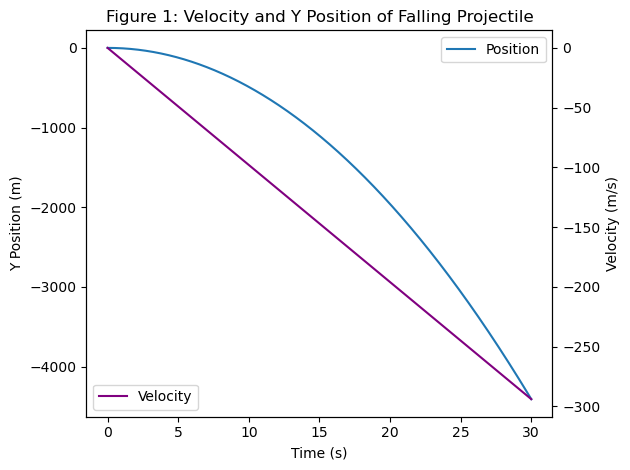

In [1]:
#Question 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

G=6.6743*(10**-11)
M_earth=5.972*(10**24)
R_earth=6378100
g=(G*M_earth)/R_earth**2

#1.1
distance=4000
tf=np.sqrt((2*distance)/g)
print("1.1")
print(f"It takes {tf} seconds to fall")
print()
#1.2
alpha=0
gamma=0

def derivatives (t,s):
    y,v=s[0],s[1]
    dydt=v
    dvdt=-g+(alpha*(v**gamma))
    return [dydt,dvdt]
#1.3
t0=0
y0=0
v0=0
yf=0
tf=30
t=np.linspace(t0,tf,1000)
soln=solve_ivp(derivatives,(t0,tf),[y0,v0], t_eval=t)
y=soln.y[0]
v=soln.y[1]

##FIGURE 1
fig,ax=plt.subplots()
ax.plot(t,y,label='Position')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Y Position (m)")
ax.legend(loc="upper right")
ax2=ax.twinx()
ax2.plot(t,v,color='purple',label='Velocity')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 1: Velocity and Y Position of Falling Projectile")
plt.legend(loc="lower left")
plt.tight_layout()

#1.4
y0=4000

def crash(t,y):
   return y[0]

crash.terminal = True
soln = solve_ivp (derivatives , (t0 , tf),[y0,v0],t_eval=t,events=crash)
event=soln.t_events
print("1.4")
print("Using solve_ivp it takes:")
print(event)
print("The solve Ivp answer and the analytical solution are identical to 8 decimal places, where solve_ivp then rounds off")
#print(y[-1])

With varying gravity: [array([28.58163529])]


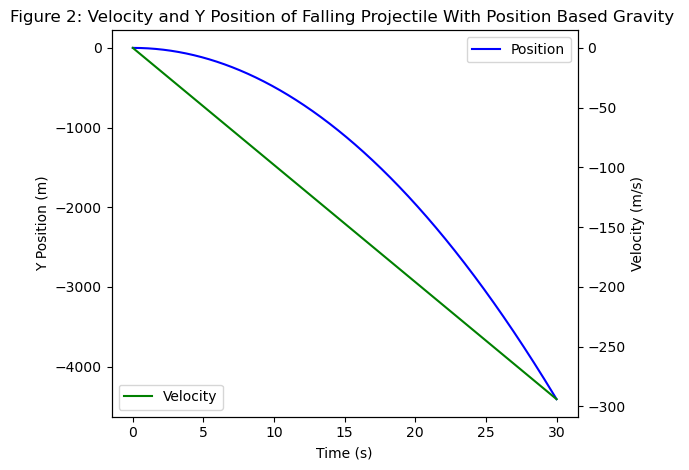

In [2]:
#Question 2
#2.1
R_earth=6378100
g0=(G*M_earth)/R_earth**2
def gr (r):
    g_r=g0*(r/R_earth)
    return g_r

def derivatives (t,s):
    y,v=s[0],s[1]
    g_r = gr(R_earth - y)
    dydt=v
    dvdt=-g_r+(alpha*(v**gamma))
    return [dydt,dvdt]

t0=0
y0=0
v0=0
tf=30
alpha=0
gamma=0
t=np.linspace(t0,tf,1000)

soln = solve_ivp(derivatives, (t0, tf), [y0, v0], t_eval=t)

y=soln.y[0] 
v=soln.y[1]
##FIGURE 2

fig,ax=plt.subplots()
ax.plot(t,y,label='Position',color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Y Position (m)")
ax2=ax.twinx()
ax2.plot(t,v,label='Velocity',color='green')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 2: Velocity and Y Position of Falling Projectile With Position Based Gravity ")
ax.legend()
ax2.legend(loc=3)
plt.tight_layout()
y0=4000
def crash(t,y):
   return y[0] 

crash.terminal = True
soln = solve_ivp (derivatives , (t0 , tf),[y0,v0],t_eval=t,events=crash)
event=soln.t_events
print(f"With varying gravity: {event}")

In [3]:
#2.2 
#Incorporating a height dependent g(y) will increase the time it takes for the projectile to fall. This is because as the object falls 
#further down the hole the gravitational force will decrease, though only slighlty, causing the object to fall at an decreasing acceleration


[array([83.4597004])]
-50.03676913102077


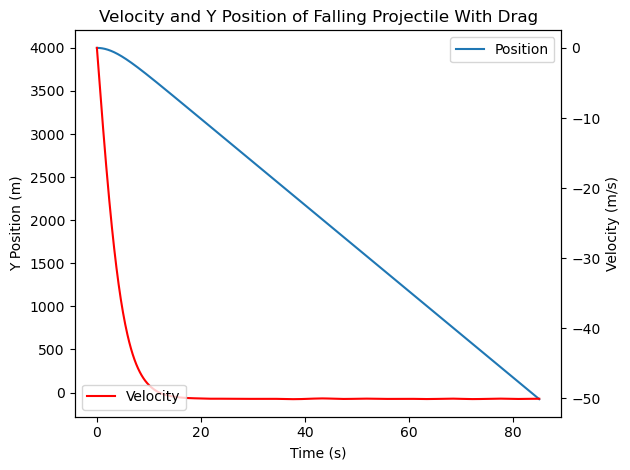

In [4]:
#Question 2
#2.3
R_earth=6378100
g0=(G*M_earth)/R_earth**2
def gr (r):
    g_r=g0*(r/R_earth)
    return g_r

def derivatives (t,s):
    y,v=s[0],s[1]
    g_r = gr(R_earth - y)
    dydt=v
    dvdt=-g_r+(alpha*(v**gamma))
    return [dydt,dvdt]

t0=0
tf=85
y0=4000
v0=0
alpha=.00391
gamma=2
t=np.linspace(t0,tf,1000)
def crash(t,y):
    return y[0]
    
soln = solve_ivp(derivatives, (t0, tf), [y0, v0], t_eval=t,events=crash)
event=soln.t_events
print(event)
y=soln.y[0] 
v=soln.y[1]
print(v[-1])

fig,ax=plt.subplots()
ax.plot(t,y,label='Position')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Y Position (m)")
ax2=ax.twinx()
ax2.plot(t,v,color='red',label='Velocity')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax.set_title("Velocity and Y Position of Falling Projectile With Drag")
ax.legend()
ax2.legend(loc=3)
plt.tight_layout()
#Including drag increases fall time because it results in a lower velocity which will cause the projectile to fall at a slower rate 

When the projectile reaches a depth of 4000.0020675913775 it has traveled 5.541620490083385 in the transverse direction. Meaning if the shaft is 5m wide it will hit the side before reaching the bottom
[array([27.61255104])]


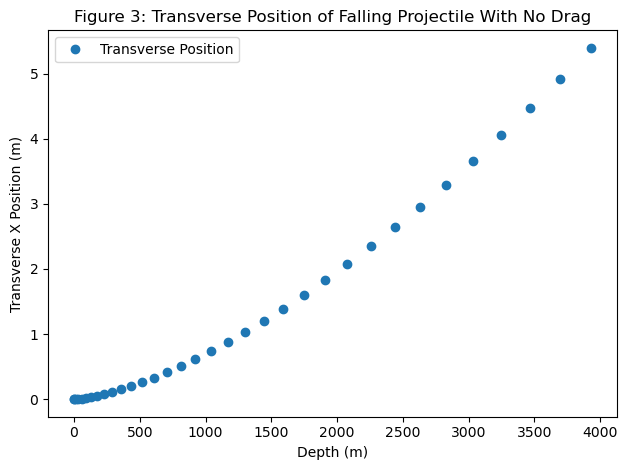

In [5]:
#Question 3
#3.1
R_earth=6378100
omega=7.272*(10**-5)
g0=(G*M_earth)/R_earth**2
def gr (r):
    g_r=g0*(R_earth/r)
    return g_r

def derivatives (t,s):
    y,vy,x,vx=s[0],s[1],s[2],s[3]
    g_r = gr(R_earth - y)
    dydt=vy
    dvydt=-g_r+(alpha*(vy**gamma))-(2*omega*vx)
    dxdt=vx 
    dvxdt=-2*m*omega*vy
    return [dydt,dvydt,dxdt,dvxdt]
m=1
t0=0
tf=28.57564553
y0=0
vy0=0
vx0=0
x0=0
alpha=0
gamma=0
t=np.linspace(t0,tf,1000)

soln = solve_ivp(derivatives, (t0, tf), [y0, vy0, x0, vx0], t_eval=t)

t_plot=soln.t
depth=np.abs(soln.y[0]) 
vy=soln.y[1]
x=soln.y[2]
vx=soln.y[3]
#3.2
#FIGURE 3

fig,ax=plt.subplots()
ax.plot(depth[::30],x[::30],marker='o',label='Transverse Position',ls='')
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Transverse X Position (m)")

ax.set_title("Figure 3: Transverse Position of Falling Projectile With No Drag")
ax.legend()
ax2.legend(loc=3)
plt.tight_layout()
#3.3
print(f"When the projectile reaches a depth of {depth[-1]} it has traveled {x[-1]} in the transverse direction. Meaning if the shaft is 5m wide it will hit the side before reaching the bottom")

def hit_shaft_wall(t, s):
    x = s[2] 
    return 5 - abs(x)  

hit_shaft_wall.terminal = True  
hit_shaft_wall.direction = 0
soln = solve_ivp(derivatives, (t0, tf), [y0, vy0, x0, vx0], t_eval=t,events=hit_shaft_wall)
print(soln.t_events)

As can be seen adding drag does affect the transverse position, with no drag the total transverse distance was just over 5 meters, with drag the projectile
moves over 20 in the transverse direction while falling vertically
[array([[-3.41060513e-13, -5.00454636e+01,  2.32720929e+01,
         5.81760000e-01]])]
[array([40.47372703])]


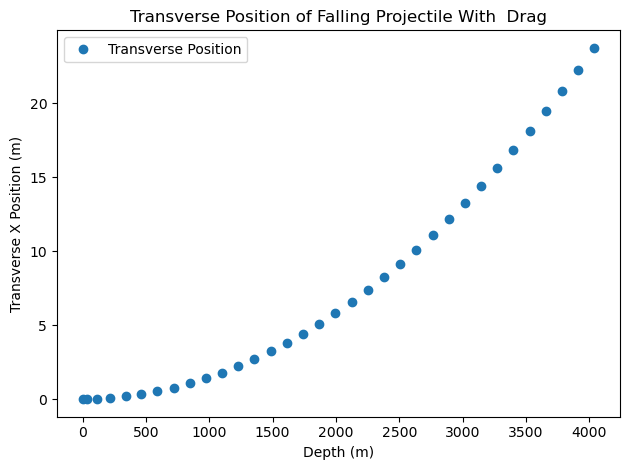

In [6]:
#Question 3.4
R_earth=6378100
omega=7.272*(10**-5)
g0=(G*M_earth)/R_earth**2
def gr (r):
    g_r=g0*(R_earth/r)
    return g_r
def derivatives (t,s):
    y,vy,x,vx=s[0],s[1],s[2],s[3]
    g_r = gr(R_earth - y)
    dydt=vy
    dvydt=-g_r+(alpha*(vy**gamma))-(2*omega*vx)
    dxdt=vx 
    dvxdt=-2*m*omega*vy
    return [dydt,dvydt,dxdt,dvxdt]
m=1
t0=0
tf=85
y0=0
vy0=0
vx0=0
x0=0
alpha=.00391
gamma=2
t=np.linspace(t0,tf,1000)

soln = solve_ivp(derivatives, (t0, tf), [y0, vy0, x0, vx0], t_eval=t)

t_plot=soln.t
depth=np.abs(soln.y[0]) 
vy=soln.y[1]
x=soln.y[2]
vx=soln.y[3]


fig,ax=plt.subplots()
ax.plot(depth[::30],x[::30],marker='o',label='Transverse Position',ls='')
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Transverse X Position (m)")


ax.set_title("Transverse Position of Falling Projectile With  Drag")
ax.legend()
ax2.legend(loc=3)
plt.tight_layout()

print("As can be seen adding drag does affect the transverse position, with no drag the total transverse distance was just over 5 meters, with drag the projectile")
print("moves over 20 in the transverse direction while falling vertically")
y0=4000
def hit_bottom(t,s):
    y=s[0]
    return y
hit_bottom.terminal = True  
soln = solve_ivp(derivatives, (t0, tf), [y0, vy0, x0, vx0], t_eval=t,events=hit_bottom)
print(soln.y_events)

def hit_shaft_wall(t, s):
    x = s[2] 
    return 5 - abs(x)  

hit_shaft_wall.terminal = True  
hit_shaft_wall.direction = 0
soln = solve_ivp(derivatives, (t0, tf), [y0, vy0, x0, vx0], t_eval=t,events=hit_shaft_wall)
print(soln.t_events)

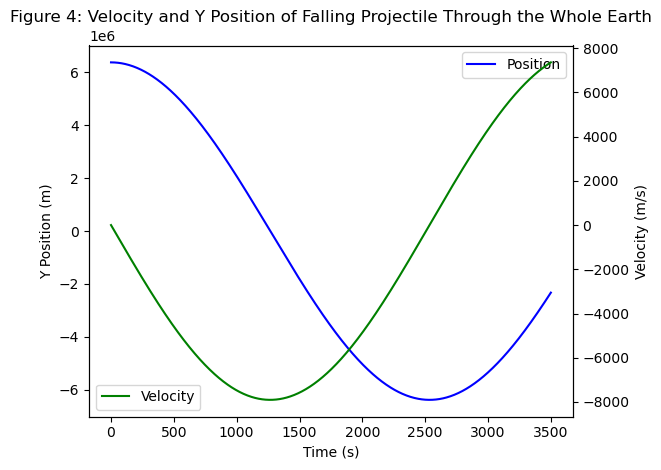

In [7]:
#Question 4

#4.1

R_earth=6378100
g0=(G*M_earth)/R_earth**2
def gr (r):
    g_r=(g0*(r/R_earth))
    return g_r

def derivatives (t,s):
    y,v=s[0],s[1]
    g_r = gr(y)
    dydt=v
    dvdt=-g_r+(alpha*(v**gamma))
    return [dydt,dvdt]

t0=0
y0=6378100
v0=0
tf=3500
alpha=0
gamma=0
t=np.linspace(t0,tf,1000)

soln = solve_ivp(derivatives, (t0, tf), [y0, v0], t_eval=t)
y=soln.y[0] 
v=soln.y[1]
##FIGURE 4

fig,ax=plt.subplots()
ax.plot(t,y,label='Position',color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Y Position (m)")
ax2=ax.twinx()
ax2.plot(t,v,label='Velocity',color='green')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 4: Velocity and Y Position of Falling Projectile Through the Whole Earth")
ax.legend()
ax2.legend(loc=3)
plt.tight_layout()
#I notice that the velocity graph and the position graphs both seem to follow  normal sinusoidal curves. The lowest position achieved is the radius of the earth 
#in the negative direction and when the porjectile reaches this point the velocity is 0

In [8]:
for i in range(len(y) - 1):
    if y[i] > -R_earth and y[i+1] <= -R_earth:
        t_event = t[i+1] 
        v_event = v[i+1]
        print(f"Time when projectile reaches negative radius of Earth: {t_event} seconds")
        print(f"Velocity at that time: {v_event} m/s")
        

Time when projectile reaches negative radius of Earth: 2515.5155155155157 seconds
Velocity at that time: -182.5162855582853 m/s


In [9]:
#QUestion 4.3
G=6.6743*(10**-11)
M_earth=5.972*(10**24)
R_earth=6378100
orbital_v=np.sqrt((G*M_earth)/(R_earth))
circ_e=2*np.pi*R_earth
time_orbit=circ_e/orbital_v
print(f"The orbital period is {time_orbit} seconds which is rougly double the crossing time")


The orbital period is 5069.371199675785 seconds which is rougly double the crossing time


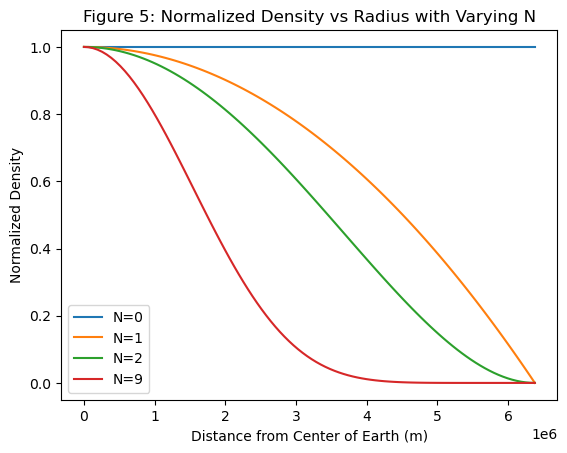

In [11]:
#Question 5.1
from scipy.integrate import quad
p_n=1
R_earth=6378100
m_earth=5.972*(10**24)
r_span=np.linspace(R_earth,0,100)
def p_r(r,p_n,n):
    pr=p_n*((1-(r**2/R_earth**2))**n)
    return pr


def quadp_r(r):
    p=(4*np.pi)*p_n*((1-(r**2/R_earth**2))**n)*r**2
    return p
n=0
density_0=p_r(r_span,p_n,n)
n=1
density_1=p_r(r_span,p_n,n)
n=2
density_2=p_r(r_span,p_n,n)
n=9
density_9=p_r(r_span,p_n,n)


#FIgure 5
fig,ax=plt.subplots()
ax.plot(r_span,density_0,label="N=0")
ax.plot(r_span,density_1,label="N=1")
ax.plot(r_span,density_2,label="N=2")
ax.plot(r_span,density_9,label="N=9")
ax.set_xlabel("Distance from Center of Earth (m)")
ax.set_ylabel("Normalized Density")
ax.set_title("Figure 5: Normalized Density vs Radius with Varying N")
ax.legend()



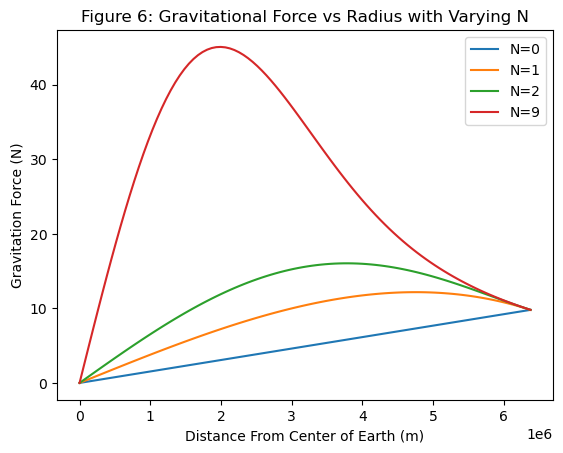

In [12]:
#5.2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
n=0
sum0,err0=quad(quadp_r,0,R_earth)
p_n0=m_earth/sum0
p_n_0=p_r(r_span,p_n0,n)

n=1
p_n=1
sum1,err1=quad(quadp_r,0,R_earth)
p_n1=m_earth/sum1
p_n_1=p_r(r_span,p_n1,n)

n=2
p_n=1
sum2,err2=quad(quadp_r,0,R_earth)
p_n2=m_earth/sum2
p_n_2=p_r(r_span,p_n2,n)

n=9
p_n=1
sum9,err9=quad(quadp_r,0,R_earth)
p_n9=m_earth/sum9
p_n_9=p_r(r_span,p_n9,n)

R_earth = 6378100  
m_earth = 5.972 * (10**24)  
G = 6.6743*(10**-11)  

def mass(r, n, p_n):
    return (4*np.pi)*p_n*r**2*(1-(r**2/R_earth**2))**n

def mass_under(r, n, p_n):
    mass_r, err = quad(mass, 0, r, args=(n, p_n))
    return mass_r

def force(r, n, p_n):
    m = mass_under(r, n, p_n)
    force_r = G*m/r**2
    return force_r

r_span = np.linspace(1, R_earth,100)

forces_0 = [force(r, 0, p_n0) for r in r_span]
forces_1 = [force(r, 1, p_n1) for r in r_span]
forces_2 = [force(r, 2, p_n2) for r in r_span]
forces_9 = [force(r, 9, p_n9) for r in r_span]

#FIGURE 5

fig,ax=plt.subplots()
ax.plot(r_span,forces_0,label="N=0")
ax.plot(r_span,forces_1,label="N=1")
ax.plot(r_span,forces_2,label="N=2")
ax.plot(r_span,forces_9,label="N=9")
ax.set_xlabel("Distance From Center of Earth (m)")
ax.set_ylabel("Gravitation Force (N)")
ax.set_title("Figure 6: Gravitational Force vs Radius with Varying N")
ax.legend()


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.503e+00 ...  2.497e+03  2.500e+03]
        y: [[ 6.378e+06  6.378e+06 ... -6.371e+06 -6.372e+06]
            [ 0.000e+00 -2.452e+01 ... -3.596e+02 -3.351e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


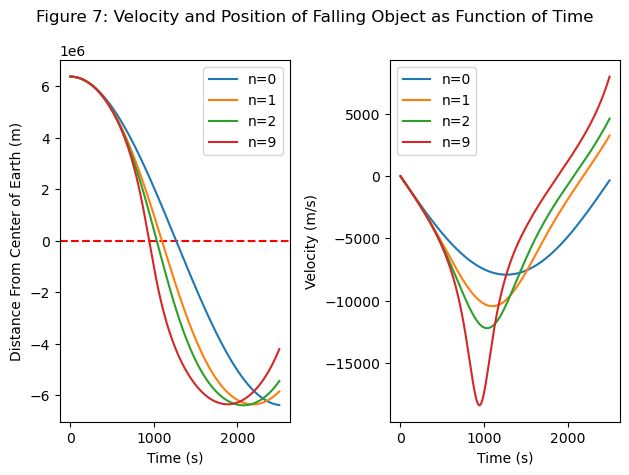

In [14]:
R_earth=6378100
g0=(G*M_earth)/R_earth**2
def gr (r):
    g_r=g0*(r/R_earth)
    return g_r


def derivatives (t,s,p_n):
    y,v=s[0],s[1]
    g_r = force(y,n,p_n)
    dydt=v
    dvdt=-g_r+(alpha*(v**gamma))
    return [dydt,dvdt]
t0=0
yi=R_earth
vi=0
tf=2500
alpha=0
gamma=0
t=np.linspace(t0,tf,1000)



n=0
soln0 = solve_ivp(derivatives, (t0, tf), [yi, vi], t_eval=t,args=(p_n0,))
print(soln0)
y0=soln0.y[0] 
v0=soln0.y[1]

n=1
soln1 = solve_ivp(derivatives, (t0, tf), [yi, vi], t_eval=t,args=(p_n1,))
y1=soln1.y[0] 
v1=soln1.y[1]
n=2
soln2 = solve_ivp(derivatives, (t0, tf), [yi, vi], t_eval=t,args=(p_n2,))
y2=soln2.y[0] 
v2=soln2.y[1]

n=9
soln9 = solve_ivp(derivatives, (t0, tf), [yi, vi], t_eval=t,args=(p_n9,))
y9=soln9.y[0] 
v9=soln9.y[1]

forces_0 = [force(r, 0, p_n0) for r in r_span]
forces_1 = [force(r, 1, p_n1) for r in r_span]
forces_2 = [force(r, 2, p_n2) for r in r_span]
forces_9 = [force(r, 9, p_n9) for r in r_span]
fig,ax=plt.subplots(1,2)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].plot(t,y0,label='n=0')
ax[0].plot(t,y1,label='n=1')
ax[0].plot(t,y2,label='n=2')
ax[0].plot(t,y9,label='n=9')
ax[0].legend()
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Distance From Center of Earth (m)")

ax[1].plot(t,v0,label='n=0')
ax[1].plot(t,v1,label='n=1')
ax[1].plot(t,v2,label='n=2')
ax[1].plot(t,v9,label='n=9')
ax[1].legend()
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Velocity (m/s)")
fig.suptitle("Figure 7: Velocity and Position of Falling Object as Function of Time")
fig.tight_layout()

In [15]:
def center(t, s, p_n):
    return s[0]

#n=0
n = 0
initial_state = [yi, 0]
sol9 = solve_ivp(derivatives, (t0, tf), initial_state,
                 args=(p_n0,), t_eval=t, events=center,dense_output=True)
t_hit = sol9.t_events[0][0]
v_hit = sol9.sol(t_hit)[1]
print(f"n = 0 Time to center = {t_hit:.2f} s, Speed at center = {v_hit:.2f} m/s")

center.terminal = True
#n=1
n = 1
initial_state = [yi, 0]
sol9 = solve_ivp(derivatives, (t0, tf), initial_state,
                 args=(p_n1,), t_eval=t, events=center,dense_output=True)
t_hit = sol9.t_events[0][0]
v_hit = sol9.sol(t_hit)[1]
print(f"n = 1 Time to center = {t_hit:.2f} s, Speed at center = {v_hit:.2f} m/s")

#n=2
n = 2
initial_state = [yi, 0]
sol9 = solve_ivp(derivatives, (t0, tf), initial_state,
                 args=(p_n2,), t_eval=t, events=center,dense_output=True)
t_hit = sol9.t_events[0][0]
v_hit = sol9.sol(t_hit)[1]
print(f"n = 2 Time to center = {t_hit:.2f} s, Speed at center = {v_hit:.2f} m/s")

#n=9
n = 9
initial_state = [yi, 0]
sol9 = solve_ivp(derivatives, (t0, tf), initial_state,
                 args=(p_n9,), t_eval=t, events=center,dense_output=True)
t_hit = sol9.t_events[0][0]
v_hit = sol9.sol(t_hit)[1]
print(f"n = 9 Time to center = {t_hit:.2f} s, Speed at center = {v_hit:.2f} m/s")



n = 0 Time to center = 1267.24 s, Speed at center = -7905.97 m/s
n = 1 Time to center = 1096.89 s, Speed at center = -10435.24 m/s
n = 2 Time to center = 1035.14 s, Speed at center = -12200.75 m/s
n = 9 Time to center = 943.87 s, Speed at center = -18392.00 m/s


In [16]:
#6.1
mass_m=7.35 * (10**22)
radius_m=1738100
G=6.6743*(10**-11)
g_moon=(G*mass_m)/(radius_m**2)
distance=4000
tf=np.sqrt((2*radius_m)/g_moon)
print("The analytical solution:")
print(f"{tf} seconds")

The analytical solution:
1463.1222198396258 seconds


In [17]:
#6.2
R_earth=6378100
m_earth=5.972*(10**24)

volume_m=(4/3)*np.pi*(radius_m**3)
density_m=mass_m/volume_m
print (f"The Moon's density is -- {density_m} -- kg/m^3")

volume_earth=(4/3)*np.pi*(R_earth**3)
density_e=m_earth/volume_earth 
print (f"While the Earth's density is -- {density_e} -- kg/m^3")
print(f" Meaning the Moon is about  {density_m/density_e} % as dense as the Earth")

The Moon's density is -- 3341.753803870318 -- kg/m^3
While the Earth's density is -- 5494.867409551201 -- kg/m^3
 Meaning the Moon is about  0.6081591337511926 % as dense as the Earth


## 6.3
If fall time is equal to:
$$
\sqrt{\frac{2 * distance}{gravity}}
$$
Distance is equal to the radius of the body, either the earth or moon.
And Gravity (g) is equal to:
$$
 gravity =\frac{G * Mass}{Radius^2}
$$
So fall time =
$$
\sqrt{\frac{2*radius}{1}*\frac{radius^2}{G*Mass}}
$$
or:
$$
\sqrt{\frac{2*radius^3}{G*M}}
$$
Density is equal to:
$$
\frac{Mass}{Volume}
$$
And in the cass of a spherical planet, density (p) equals:
$$
\frac{Mass}{\frac{4}{3}\pi*Radius^3}
$$
So fall time is proportional to:
$$
\sqrt{\frac{3}{2\pi G}*\frac{1}{p}}
$$
So fall time is roughly proportional to 1 over the square root of density
